<a href="https://colab.research.google.com/github/alero11/practica_2_auto_usado/blob/main/practica2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRACTICA 2. Prediccion precio autos usados**

<img src="https://www.neuraldojo.org/media/bg_car.jpeg"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" width="100%"/>

##**Alex Rolando Toro Benitez**     

**Contexto**

Con el aumento en la variedad de automóviles con capacidades y características diferenciadas, como modelo, año de producción, categoría, marca, tipo de combustible, volumen del motor, millaje, cilindros, color, bolsas de aire y muchos más, presentamos un desafío de predicción de precios de automóviles para todos. Todos aspiramos a tener un automóvil dentro del presupuesto con las mejores características disponibles. Para resolver el problema del precio, hemos creado un conjunto de datos de 19237 para el conjunto de datos de entrenamiento y 8245 para el conjunto de datos de prueba.

Descripción de datos
Train.csv: 19237 filas x 18 columnas (incluye columnas de precio como destino)

**Atributos**
- IDENTIFICACIÓN
- Precio: precio de la atención (columna de destino)
- Exacción
- Fabricante
- Modelo
- Año
- Categoría
- Interior de cuero
- Tipo de combustible
- Volumen del motor
- Kilometraje
- Cilindros
- Tipo de caja de cambios
- Ruedas motrices
- puertas
- Rueda
- Color
- bolsas de aire

##Objetivo de la practica

- Parte 1. En un Notebook construya un modelo para predecir el precio de un auto usado.
- Parte 2. Publique y comparta su Notebook en [Github.com](https://www.github.com)
- Parte 3. En base al trabajo desarrollado y los hallazasgos redacte, publique y comparta un articulo en [medium.com](https://www.medium.com)

##Criterios de Evaluación

Parte 1.

- Seguir todos los pasos de un proceso ML:
    - Identificación del Problema
    - Importación de datos
    - EDA
    - Modelado (probar al menos tres algoritmos)
    - Evaluación (al menos dos métricas)
    - Hypertunning con Gridsearch
    - Selección del Modelo
    - Resultados y Conclusiones

- Todo el código del proyecto esté contenido en un cuaderno o script de Jupyter o Google Colab. 
- Demuestre una ejecución y salida exitosas del código, sin errores.
- Escriba código que esté bien documentado y use funciones y clases según sea necesario.

Parte 2.

El repositorio en Github debe conteener:
- El cuaderno *.ipynb
- README.md, que explique el problema, una descripcion del dataset, requerimientos y librerias para la correcta ejecución del codigo, Resultados y conclusiones
- Licencia del codigo

Parte 3.

El articulo en medium debera contener las siguientes secciones:

- Introduccion
- Problema
- Analisis Exploratorio explicando aspectos relevantes de lo encontrado
- Modelado ML
- Evaluación y Hipertunning
- Resultados y Conclusiones
- Incluir referencia on enlace al codigo disponible en su cuenta github.

##Dataset

Puede descargar el dataset aqui: https://neuraldojo.org/media/carprice/archive.zip

##Método de Entrega del trabajo:

Enviar e mi correo: necrus.aikon@gmail.com, Asunto: Practica 2 (Stroke) lo siguiente:
- Enlace o archivo adjunto del codigo en colab
- Enlace github
- Enlace medium


## 1.- Identificación del problema

En base a la variedad de automóviles con capacidades y características diferenciadas, con diferentes caracteristicas como ser: cilindros, color, bolsas de aire y muchos más, tratar de realizar una predccion que nos permite obtener un automovil del presupuesto con las mejores características disponibles

## 2.- Importación de datos

In [35]:
#importamos las librerias
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

In [36]:
#Importamos el Dataset
!wget https://neuraldojo.org/media/carprice/archive.zip
!unzip archive.zip

--2022-04-01 04:13:59--  https://neuraldojo.org/media/carprice/archive.zip
Resolving neuraldojo.org (neuraldojo.org)... 143.95.32.198
Connecting to neuraldojo.org (neuraldojo.org)|143.95.32.198|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 606314 (592K) [application/zip]
Saving to: ‘archive.zip.2’

archive.zip.2       100%[===================>] 592.10K  --.-KB/s    in 0.1s    

2022-04-01 04:14:00 (4.56 MB/s) - ‘archive.zip.2’ saved [606314/606314]

Archive:  archive.zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: test.csv                
  inflating: train.csv               


In [46]:
#cargamos los datos en un dataframe
df = pd.read_csv('train.csv')
df.shape

(19237, 18)

## 3.- Analisis de los datos (EDA)

### 3.1 Inspección y Manipulación de los datos

In [47]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [48]:
#revisemos los tipo de datos de  nuestro dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [49]:
#veamos algunas estadisticas
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


### 3.2 Verificación de valores nulos

In [41]:
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

### 3.3 Distribución y correlación de datos

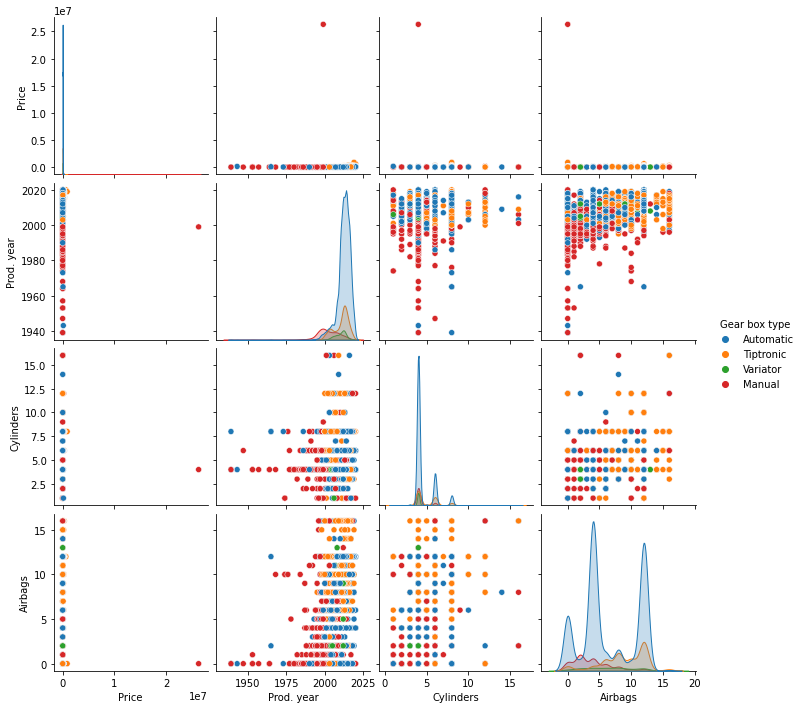

In [50]:
#Visualicemos nuestros datos
sns.pairplot(data=df[['Price','Prod. year','Cylinders','Airbags','Gear box type']], hue='Gear box type')

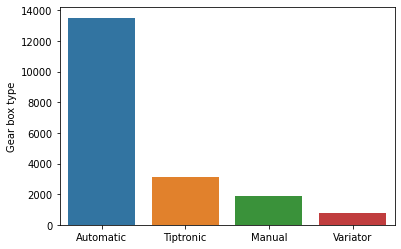

In [43]:
#Con seaborn podemos presentar la distribución en un barplot
sns.barplot(x=df['Gear box type'].value_counts().index, y=df['Gear box type'].value_counts())

## 4.- Modelado (probar al menos tres algoritmos)